# Simulating M/D/c queues

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

SAMPLE_SIZE = 1000
ARRIVAL_RATE = 1
EXECUTION_RATE = 1

## An example arrival time distribution

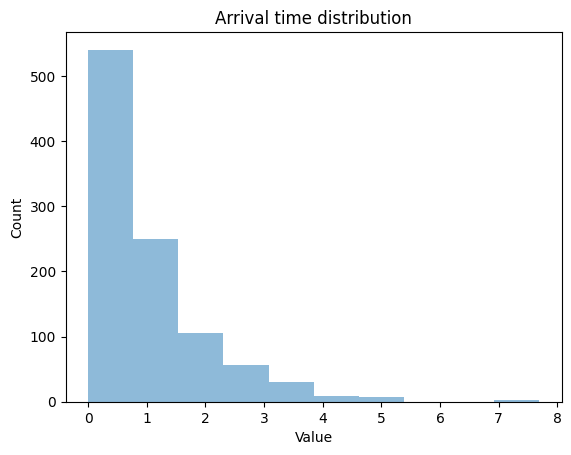

Mean arrival time: 1.0056551837719496
[0.39265878 0.41587373 0.67501711 1.67564176 0.28005772 0.62476183
 0.10800323 0.86419258 0.46335384 0.45548506]


In [2]:
inter_arrival_time = np.random.exponential(scale=1,size=SAMPLE_SIZE)

plt.title("Arrival time distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(inter_arrival_time, alpha=0.5)
plt.show()

print(f'Mean arrival time: {inter_arrival_time.mean()}')
print(inter_arrival_time[:10])

## Queue length over time

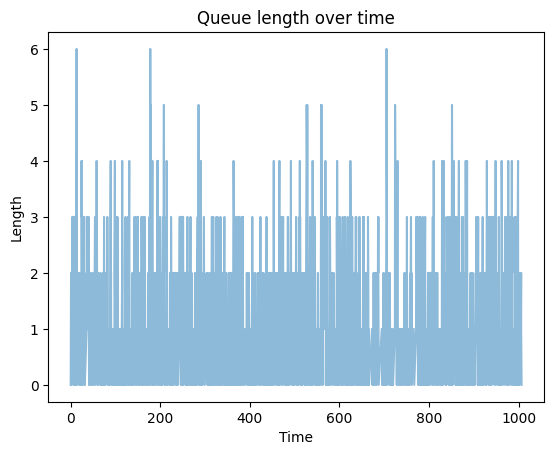

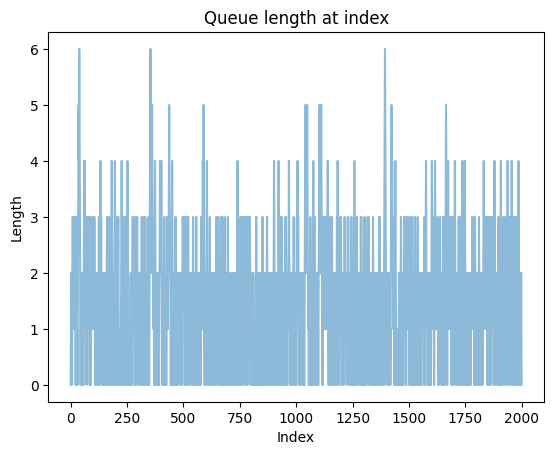

Mean queue length: 1.4792603698150923


In [3]:
from src.queue import Queue

queue = Queue(inter_arrival_time, np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=EXECUTION_RATE), executors=4)
queue.process()

plt.title("Queue length over time")
plt.xlabel("Time")
plt.ylabel("Length")
plt.plot(*zip(*queue.length_with_timestamps), alpha=0.5)
plt.show()

plt.title("Queue length at index")
plt.xlabel("Index")
plt.ylabel("Length")
plt.plot(queue.length, alpha=0.5)
plt.show()

print(f'Mean queue length: {queue.length.mean()}')


## Departure time and distribution

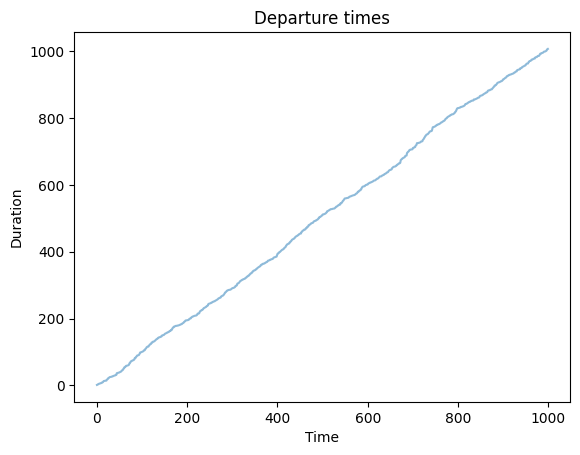

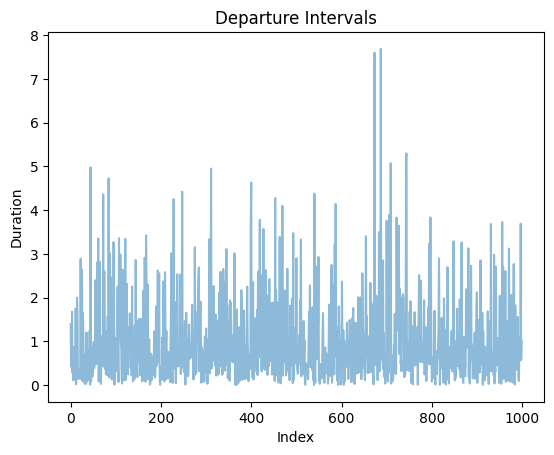

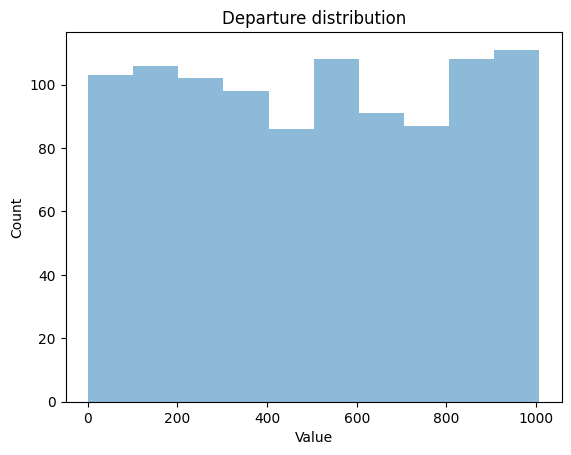

In [4]:
from src.queue import timestamps_to_intervals

plt.title("Departure times")
plt.xlabel("Time")
plt.ylabel("Duration")
plt.plot(queue.departure_times, alpha=0.5)
plt.show()

plt.title("Departure Intervals")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.plot(timestamps_to_intervals(queue.departure_times), alpha=0.5)
plt.show()

plt.title("Departure distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.departure_times, alpha=0.5)
plt.show()

## Wait time and distribution

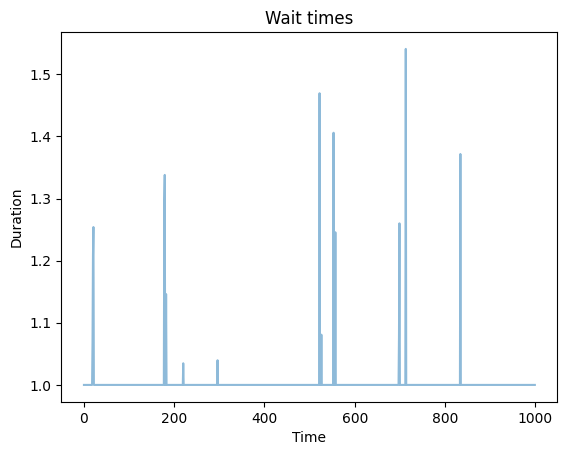

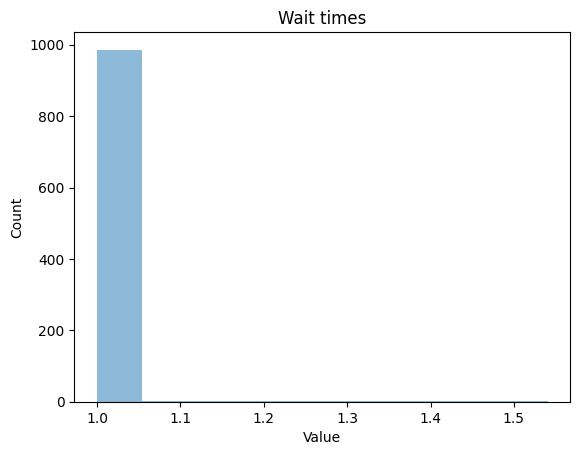

In [5]:
plt.title("Wait times")
plt.xlabel("Time")
plt.ylabel("Duration")
plt.plot(queue.wait_times, alpha=0.5)
plt.show()

plt.title("Wait times")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.wait_times, alpha=0.5)
plt.show()

# Utilization

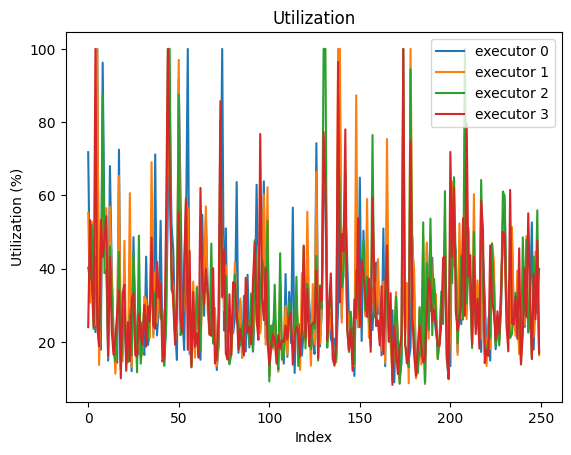

In [6]:
plt.title("Utilization")
plt.xlabel("Index")
plt.ylabel("Utilization (%)")
# plot lines 
plt.plot(queue.utilization(0) * 100, label = "executor 0") 
plt.plot(queue.utilization(1) * 100, label = "executor 1") 
plt.plot(queue.utilization(2) * 100, label = "executor 2") 
plt.plot(queue.utilization(3) * 100, label = "executor 3") 
plt.legend() 
plt.show()